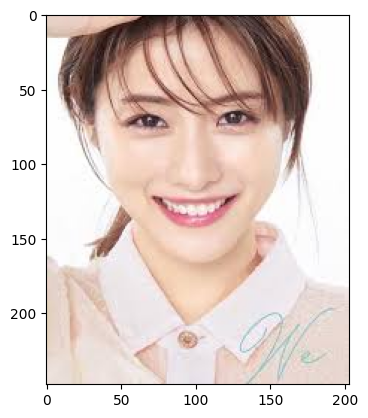

In [1]:
import matplotlib.pyplot as plt
import json
from lib.Smile import SMILE

input_path = "C:/Users/goode/Downloads/images.jpg"

image = plt.imread(input_path)


# 顯示背景圖片
plt.imshow(image)


In [3]:
nowfig=SMILE(input_path, device='cuda',filter=0.9)

nowfig.find_all_tooth()

print(nowfig.smile_info['error'])

output_path=c:\gits\SMILE_server\app/outputs/2024-08-02-04-09-07.jpg
using ESPCN_x3
SMILE_init
臉中線斜率m=18.343629343629463
boximg ok
found mouth

image 1/1 c:\gits\SMILE_server\app\outputs\2024-08-02-04-09-07.jpg: 224x640 1 tooth, 101.1ms
Speed: 2.0ms preprocess, 101.1ms inference, 48.3ms postprocess per image at shape (1, 3, 224, 640)
['tooth not found']


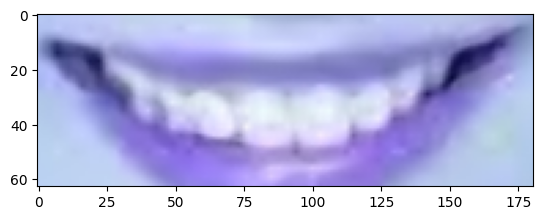

In [4]:
plt.imshow(nowfig.boximg)


In [5]:
nowfig.smile_info

{'image': {'width': 609, 'height': 744},
 'date': '2024-08-02 04:09:07',
 'error': ['tooth not found'],
 'mouth': [[0.363, 0.495],
  [0.386, 0.514],
  [0.403, 0.527],
  [0.426, 0.539],
  [0.455, 0.547],
  [0.49, 0.55],
  [0.527, 0.546],
  [0.558, 0.537],
  [0.584, 0.525],
  [0.602, 0.512],
  [0.626, 0.492],
  [0.608, 0.496],
  [0.587, 0.5],
  [0.561, 0.504],
  [0.53, 0.509],
  [0.491, 0.513],
  [0.454, 0.51],
  [0.425, 0.506],
  [0.401, 0.502],
  [0.381, 0.498]],
 'mouth_width': 161,
 'mouse_box': [10, 171, 10, 53],
 'tooth_boxes': []}

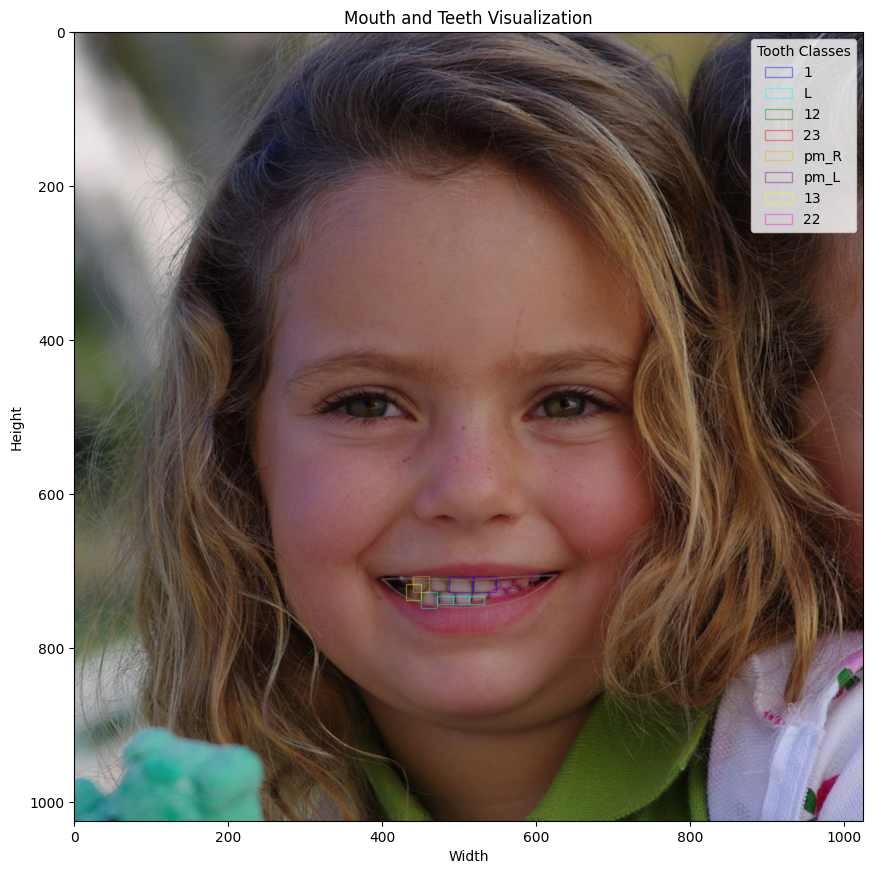

In [15]:
import json
import matplotlib.pyplot as plt

# 解析 JSON 字符串
smile_info = json.loads("""{
    "image": {"width": 1024, "height": 1024},
    "date": "2024-08-02 03:18:01",
    "error": [],
    "mouth": [[0.391, 0.694], [0.408, 0.709], [0.423, 0.718], [0.444, 0.725], [0.468, 0.729], [0.498, 0.73], [0.528, 0.727], 
              [0.554, 0.722], [0.576, 0.714], [0.592, 0.704], [0.611, 0.689], [0.597, 0.689], [0.579, 0.69], [0.558, 0.691], 
              [0.531, 0.693], [0.499, 0.695], [0.469, 0.694], [0.443, 0.693], [0.423, 0.693], [0.405, 0.693]],
    "mouth_width": 225,
    "mouse_box": [10, 235, 10, 52],
    "tooth_boxes": [[0.49, 0.7, 0.03, 0.02], [0.52, 0.7, 0.03, 0.02], [0.49, 0.72, 0.02, 0.01], [0.47, 0.72, 0.02, 0.01],
                    [0.46, 0.7, 0.02, 0.02], [0.57, 0.7, 0.02, 0.01], [0.51, 0.72, 0.02, 0.01], [0.45, 0.72, 0.02, 0.02], 
                    [0.44, 0.7, 0.02, 0.02], [0.58, 0.69, 0.01, 0.01], [0.55, 0.7, 0.02, 0.01], [0.43, 0.71, 0.02, 0.02], 
                    [0.54, 0.71, 0.02, 0.01], [0.56, 0.71, 0.02, 0.01]],
    "tooth_cls": ["1", "1", "L", "L", "12", "23", "L", "L", "pm_R", "pm_L", "pm_L", "13", "22", "pm_L"],
    "tooth_num": 14,
    "most_posterior_maxillary_teeth": 10,
    "arc_ratio": -141,
    "buccal_corridor": 23
}""")

# 提取圖像的寬度和高度
image_width = smile_info['image']['width']
image_height = smile_info['image']['height']

# 將相對坐標轉換為絕對坐標
def relative_to_absolute(coords, width, height):
    return [(x * width, y * height) for x, y in coords]

mouth_points = smile_info['mouth']
tooth_boxes = smile_info['tooth_boxes']
tooth_cls = smile_info['tooth_cls']

mouth_points_abs = relative_to_absolute(mouth_points, image_width, image_height)
mouth_points_abs.append(mouth_points_abs[0])
tooth_boxes_abs = relative_to_absolute([box[:2] for box in tooth_boxes], image_width, image_height)
tooth_sizes = [box[2:4] for box in tooth_boxes]

# 顏色映射字典
color_map = {
    'L': 'cyan',
    '1': 'blue',
    '12': 'green',
    '22': 'magenta',
    '13': 'yellow',
    '23': 'red',
    'pm_R': 'orange',
    'pm_L': 'purple'
}

# 加載背景圖片
background_image_path = "input.png"  # 替換為你的背景圖片路徑
background_image = plt.imread(background_image_path)

fig, ax = plt.subplots(figsize=(image_width / 100, image_height / 100), dpi=100)

# 顯示背景圖片
plt.imshow(background_image, extent=[0, image_width,  image_height, 0], origin='upper')

# 繪製口腔輪廓
mouth_x, mouth_y = zip(*mouth_points_abs)
ax.plot(mouth_x, mouth_y, marker='', linestyle='-', color='gray', alpha=0.4)

# 繪製牙齒並根據牙齒類別上色
handles = []
labels = []

for (x, y), (w, h), cls in zip(tooth_boxes_abs, tooth_sizes, tooth_cls):
    color = color_map.get(cls, 'gray')  # 默認顏色為灰色
    rect = plt.Rectangle((x - w * image_width / 2, y - h * image_height / 2), w * image_width, h * image_height, 
                         linewidth=1, edgecolor=color, facecolor='none', alpha=0.4)
    ax.add_patch(rect)
    if cls not in labels:
        handles.append(rect)
        labels.append(cls)

# 添加圖例
ax.legend(handles, labels, title='Tooth Classes')

# 設置圖形的範圍和標籤
ax.set_xlim(0, image_width)
ax.set_ylim(image_height, 0)

ax.set_title('Mouth and Teeth Visualization')
ax.set_xlabel('Width')
ax.set_ylabel('Height')

# 顯示圖形
plt.show()


In [7]:
import matplotlib.pyplot as plt
from lib.Smile import SMILE

input_path = "input.png"

image = plt.imread(input_path)


# 顯示背景圖片
nowfig=SMILE(input_path, device='cpu',filter=0.9)

nowfig.find_all_tooth()
nowfig.draw_result()

#plt.imshow(plt.imread(nowfig.output_path))

print(nowfig.smile_info)

output_path=c:\gits\SMILE_server\app/outputs/2024-08-02-05-27-44.png
SMILE_init
臉中線斜率m=0.04699738903120837
boximg ok
found mouth

image 1/1 c:\gits\SMILE_server\app\outputs\2024-08-02-05-27-44.png: 160x640 17 tooths, 60.6ms
Speed: 3.0ms preprocess, 60.6ms inference, 5.1ms postprocess per image at shape (1, 3, 160, 640)
[26.73889446258545]
All tooth found and img output
{'image': {'width': 1024, 'height': 1024}, 'date': '2024-08-02 05:27:44', 'error': [], 'mouth': [[0.389, 0.694], [0.406, 0.707], [0.421, 0.716], [0.442, 0.723], [0.467, 0.727], [0.497, 0.728], [0.528, 0.725], [0.553, 0.719], [0.575, 0.711], [0.59, 0.703], [0.61, 0.688], [0.595, 0.688], [0.578, 0.689], [0.557, 0.69], [0.532, 0.691], [0.5, 0.694], [0.469, 0.692], [0.443, 0.692], [0.422, 0.692], [0.404, 0.693]], 'mouth_width': 226, 'mouse_box': [10, 236, 10, 51], 'tooth_boxes': [[0.49, 0.7, 0.03, 0.02], [0.49, 0.72, 0.02, 0.01], [0.52, 0.7, 0.03, 0.02], [0.47, 0.72, 0.02, 0.01], [0.46, 0.7, 0.02, 0.02], [0.44, 0.7, 0.02, 0.

<Figure size 1024x1024 with 0 Axes>